# Logistic Regression
# Scaling
# Hyperparameter Tuning

In this notebook you will see a short example of how to select a model, scale your data and tune the hyperparamters of your models using grid or random search.  

We will use the titanic dataset.  
Since you've already worked your way through the steps of exploring and cleaning the data as well as selecting proper features for modelling in another notebook, we will skip this part here and use the **preprocessed data** from the logistic regression notebook. 

In [1]:
# Import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer

# set seaborn plot style
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")
RSEED = 10

In [2]:
# Import data 
df = pd.read_csv('data/titanic_preprocessed.csv')
df.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0


In [ ]:
#... or we could reload the stored titanic_dmy from the other notebook
#%store -r titanic_dmy
#titanic_dmy.head(2)

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0


But in this notebook, we will use the preprocessed data from the titanic_preprocessed.csv!

In [4]:
# Check for missing data
df.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

## Train-Test-Split

Train-Test-Split splits arrays or matrices, also for example our dataframe, into random train and test subsets.  
The main idea of splitting the dataset into a validation set is to prevent our model from overfitting i.e., the model becomes really good at classifying the samples in the training set but cannot generalize and make accurate classifications on the data it has not seen before.  

We will define the target and predictors and split our dataset into a train and test set.

In [5]:
# Define predictors and target
y = df.Survived
X = df.drop('Survived', axis=1)

In [6]:
df.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0


In [7]:
# Check Y
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
# Check X
X.head(2)

,Age,SibSp,Parch,Fare,male,Q,S
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0


In [ ]:
# Train-test-split (function from sklearn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #chunk we split from dataset to test (apart from training) (test_size=0.2) and y=yes - shares of zeros and nulls is the same in test and training set (stratify=y)
# create four new variable feature and target test and train set

In [10]:
for set in (X_train, X_test, y_train, y_test):
    print(set.shape)

(711, 7)
(178, 7)
(711,)
(178,)


## Logistic Regression in scikit-learn

In [11]:
#import Logistic Regression classifier from sklearn
from sklearn.linear_model import LogisticRegression

So, how easy is it to make some predictions now?

In [12]:
classifier = LogisticRegression() # instantiate a sklearn logistic regression classs
classifier.fit(X_train, y_train) # fit the classifier/model on our train data 
y_prediction = classifier.predict(X_test) # use the fit model to predict on our test data 

#have a look at the predicitons
y_prediction[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
y_test #compare to see how well our model works

159    0
125    0
427    0
421    0
564    0
      ..
39     1
90     0
881    0
851    1
636    0
Name: Survived, Length: 178, dtype: int64

## Model performance metrics
example 1: confusion matrix

In [14]:
cm = confusion_matrix(y_test, y_prediction, labels=[0,1]) # assign a confusion matrix that compares test data and predictions 
cm

array([[97, 13],
       [25, 43]])

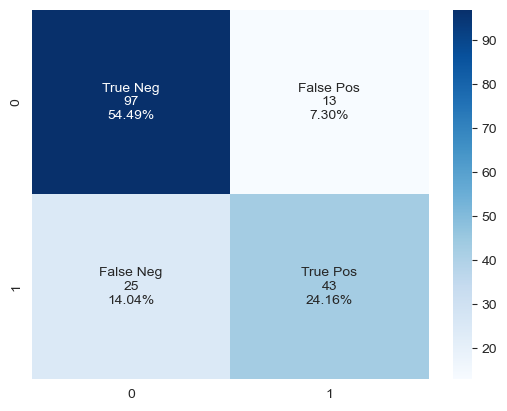

In [ ]:
# Visualizsation of the confusion_matrix (do not need to unserstand code here for viz)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues');

# show how many predications were correct done be the prediction model (y-axis = realtiy survival, x-axis = model prediction of survival)
# diagonal correct predictions (0-0 and 1-1) and rest false predictions

In this labels parameter sequence, the matrix horizontally reads the "predicted" and vertically the "actual" labels,  
so in the first line True Negatives, False Positives and in the second line False Negatives and True Positives.  
The results from the confusion matrix are telling us that 97 and 43 are the number of correct predictions. 13 and 25 are the number of incorrect predictions.

sklearn classifikation report

In [16]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.77      0.63      0.69        68

    accuracy                           0.79       178
   macro avg       0.78      0.76      0.76       178
weighted avg       0.78      0.79      0.78       178



This line of code generates and prints a detailed report summarizing the performance of a classification model.  
It compares the actual labels (ground truth) in your test dataset (y_test) with the predictions made by your model (y_prediction).  
The report provides key metrics that help you understand how well your model is classifying different classes.

__Precision__ is the accuracy of positive predictions:  
Precision = TP/(TP + FP)  
  
__Recall__ tells you what percent of the positive cases did you in fact catch?  
The fraction of positives that were correctly identified:  
Recall = TP/(TP+FN)

__Accuracy__ is the overall accuracy of your model.  
It's the percentage of samples that were correctly classified across all classes.
Accuracy = (TP+TN)/Total

**Let us learn about Classification Report: https://muthu.co/understanding-the-classification-report-in-sklearn/**

## Model selection

1. import all the classifiers you want to evaluate

In [17]:
#import all the classifiers you want to evaluate
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

2. append them to a list

In [18]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('SGD', SGDClassifier(random_state=RSEED)))

In [ ]:
models #list with six models to apply

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto')),
 ('SGD', SGDClassifier(random_state=10))]

3. iterate over the list and get a performance metric for every model  
(here, we chose "accuracy", the ratio of the number of correctly classified cases to the total of cases under evaluation - but it could be based on every other perfomance metric)

In [ ]:
# evaluate each model in turn (six model fits to data and tested to trainingset and get accuracy score of them as result)
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.787598 (0.057963)
LDA: 0.786228 (0.061278)
KNN: 0.689143 (0.032614)
NB: 0.767899 (0.052163)
SVM: 0.700313 (0.051654)
SGD: 0.662520 (0.059925)


Based on these results, we move on with the Linear Regression Classifier #best results of accuracy of LR

---
## Features Scaling

Often the input features of your model have different units which means that the variables also have different scales. While some model types (e.g. tree-based models like decision tree or random forest) are unaffected by the scale of numerical input variables, many machine learning algorithms including for example algorithms using distance measures (e.g. KNN, SVM) perform better when the input features are scaled to a specific range. 

The most popular techniques for scaling are **normalization** and **standardization**. 

Chech the [link](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/) for further info. 

![scaling](images/normalization_vs_standardization.png)

In [21]:
# Before we have a look at the different methods, 
# we have to define which columns we want to scale.
display(df.describe().round(2))
col_scale = ['Age', 'SibSp', 'Parch', 'Fare']

,Survived,Age,SibSp,Parch,Fare,male,Q,S
count,889.00,889.00,889.00,889.00,889.00,889.00,889.00,889.00
mean,0.38,29.02,0.52,0.38,32.10,0.65,0.09,0.72
std,0.49,13.21,1.10,0.81,49.70,0.48,0.28,0.45
min,0.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,22.00,0.00,0.00,7.90,0.00,0.00,0.00
50%,0.00,26.00,0.00,0.00,14.45,1.00,0.00,1.00
75%,1.00,36.50,1.00,0.00,31.00,1.00,0.00,1.00
max,1.00,80.00,8.00,6.00,512.33,1.00,1.00,1.00


### Data Standardization 

In order to standardize a dataset it is necessary to rescale the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. You can think of it as subtracting the mean value or centering the data. 
Sklearn provides us for this case with the [Standard scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

A value is standardized as follows: 


$ x_{scaled} = \frac{x – \mu}{\sigma}  $, where 

$ \mu = \frac{\sum{x}}{m} $ is the mean, where m is the number of observations

$ \sigma = \sqrt{ \frac{\sum{ (x – \mu)^2 }}{m}} $ is the standard deviation



In [22]:
# Scaling with standard scaler
# the fit part method is calculating the mean and the variance of the data
# fit_transform applies this to transform all the features in respect to that values
# transform applies this to new data in respect to that already learned values, not the new data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[col_scale])
X_test_scaled = scaler.transform(X_test[col_scale])

# Concatenating scaled and dummy columns 
X_train_preprocessed = np.concatenate([X_train_scaled, X_train.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed = np.concatenate([X_test_scaled, X_test.drop(col_scale, axis=1)], axis=1)

In [23]:
X_train_preprocessed

array([[ 0.97119698,  0.46976084, -0.4614951 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.01084571, -0.46844129, -0.4614951 , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.59348825, -0.46844129, -0.4614951 , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.42444745,  0.46976084,  3.14425233, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.3489057 , -0.46844129, -0.4614951 , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.59348825, -0.46844129, -0.4614951 , ...,  1.        ,
         0.        ,  1.        ]])

### Data normalization 

Normalizing the data means to rescale it from the original range so that all values lie within the new range of 0 and 1.
We can easily do this by using the [Min-Max-Scaler](https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn. This scaler transforms the feature(s) by scaling it(them) to a given range (default range is 0 to 1). 

A value is normalized as follows: 

$ x_{scaled} = \frac{x – x_{min}}{x_{max} – x_{min}} $

(Where the min and max values pertain to the value x being normalized, from your **train** dataset)

In [24]:
# Scaling with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Define predictors and target
y2 = df.Survived
X2 = df.drop('Survived', axis=1)

In [26]:
# Train-test-split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

In [27]:
# Before we have a look at the different methods, 
# we have to define which columns we want to scale.
col_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [28]:
# Scaling with minmax scaler
mmscaler = MinMaxScaler()
X2_train_scaled = mmscaler.fit_transform(X2_train[col_scale])
X2_test_scaled = mmscaler.transform(X2_test[col_scale])

In [29]:
# Concatenating scaled and dummy columns
X2_train_preprocessed = np.concatenate([X2_train_scaled, X2_train.drop(col_scale, axis=1)], axis=1)
X2_test_preprocessed = np.concatenate([X2_test_scaled, X2_test.drop(col_scale, axis=1)], axis=1)

In [30]:
print("test", pd.DataFrame(X2_train_preprocessed).describe())
print("---")
print("train", pd.DataFrame(X2_test_preprocessed).describe())

test                 0           1           2           3           4           5  \
count  711.000000  711.000000  711.000000  711.000000  711.000000  711.000000   
mean     0.358279    0.062412    0.063994    0.062181    0.644163    0.082982   
std      0.167155    0.133327    0.138765    0.096310    0.479103    0.276049   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.268139    0.000000    0.000000    0.015412    0.000000    0.000000   
50%      0.318612    0.000000    0.000000    0.028107    1.000000    0.000000   
75%      0.457413    0.125000    0.000000    0.059532    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6  
count  711.000000  
mean     0.734177  
std      0.442081  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  
---
train                 0           1           2           3           4          

---
## Predictive Modelling

We will evaluate our model performance with a quick and more reliable way using sklearn's [cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) which implements K-fold cross validation. When training a model based on train and test split we only have one experiment. Can we really trust one experiment? 

Think of [K-fold cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) as doing K experiments and then taking the average error. It is still not perfect but better than 1 experiment which can randomly turn out to be really good. 

Whenever we have K, comes the question about the value of K.. common values are between 5 and 10 and you need to take into account the technical limitations: dataset size, compute power and available memory and time. CV takes time on large datasets.


![cv](images/cross_validation.png)

### LogisticRegression Classifier - unscaled data

In [ ]:
# Fit and evaluate model without hyperparameter tuning using cross validation and unscaled data 
logreg_classifier = LogisticRegression()
scores = cross_val_score(logreg_classifier, X_train, y_train, cv=5, n_jobs=-1, verbose=5) #use 5 cross-validation-folds (how many times to do the runs) (cv=5)

# Evaluation 
print('Score (unscaled):', round(scores.mean(), 4));

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ................................ score: (test=0.775) total time=   0.0s
[CV] END ................................ score: (test=0.789) total time=   0.0s
[CV] END ................................ score: (test=0.803) total time=   0.0s
[CV] END ................................ score: (test=0.776) total time=   0.0s
[CV] END ................................ score: (test=0.782) total time=   0.0s
Score (unscaled): 0.7848


/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

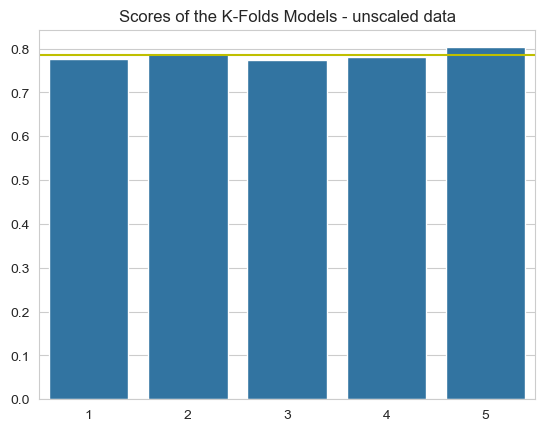

In [32]:
# plotting the scores and average score
plt.axhline(y=scores.mean(), color='y', linestyle='-')
sns.barplot(x=[1,2,3,4,5],y=scores).set_title('Scores of the K-Folds Models - unscaled data');

### LogisticRegression Classifier - standardized scaled data

In [33]:
# Fit and evaluate model using cross validation and scaled data 
logreg_scaled = LogisticRegression()
scores_scaled_std = cross_val_score(logreg_scaled, X_train_preprocessed, y_train, cv=5, n_jobs=-1)

# Evaluation
print('Score (scaled):', round(scores_scaled_std.mean(), 4))

Score (scaled): 0.7834


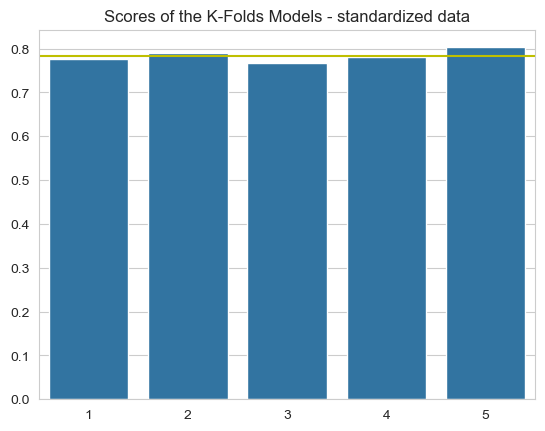

In [34]:
plt.axhline(y=scores_scaled_std.mean(), color='y', linestyle='-')
sns.barplot(x=[1,2,3,4,5],y=scores_scaled_std).set_title('Scores of the K-Folds Models - standardized data');

The model errors on standardized features have a slightly bigger standard deviation than on non-scaled features.

### LogisticRegression Classifier - normalized scaled data

Score (scaled): 0.7919


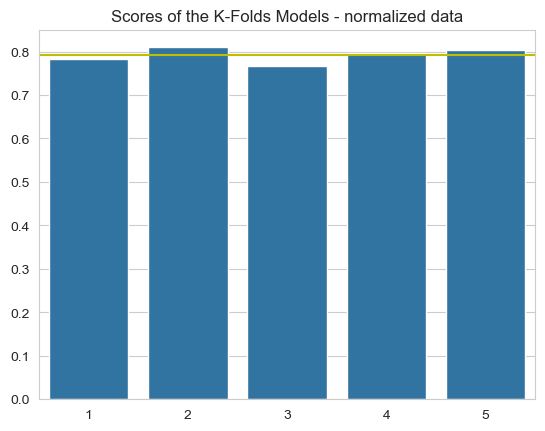

In [35]:
# Fit and evaluate model using cross validation and scaled data 
log_reg_scaled = LogisticRegression()
scores_scaled_norm = cross_val_score(log_reg_scaled, X2_train_preprocessed, y_train, cv=5, n_jobs=-1, scoring='accuracy')
# If "scoring"=None, the estimator’s default scorer (if available) is used.

# Evaluation
print('Score (scaled):', round(scores_scaled_norm.mean(), 4))

plt.axhline(y=scores_scaled_norm.mean(), color='y', linestyle='-')
sns.barplot(x=[1,2,3,4, 5],y=scores_scaled_norm).set_title('Scores of the K-Folds Models - normalized data');

In [36]:
print('Score (unscaled):', round(scores.mean(), 4))
print('Score (scaled, standardized):', round(scores_scaled_std.mean(), 4))
print('Score (scaled, normalized):', round(scores_scaled_norm.mean(), 4))

Score (unscaled): 0.7848
Score (scaled, standardized): 0.7834
Score (scaled, normalized): 0.7919


Based on these first results, we'd go for normalized data!  
But can we improve even better?


---
## Hyperparameter Tuning

Most models have many parameters that work better with some datasets than with others. Same goes with the parameters from regularization which we learned that are selected based on a trial and error process. So how do we deal selecting the parameter values that work best for our data?

#### GridSearchCV

[Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is a tuning technique that attempts to compute the optimum values of hyperparameters. It performs an exhaustive search over a prior defined parameter space using cross-validation (hence the **CV** suffix). That means it will evaluate all of the possible parameter combinations of the search space in order to find and return the best combination. 


This task, however, starts to become very time-consuming if there are many hyperparameters and the search space is huge. As you can see for k= 5 and for 2 parameters with 2, and respectively 3 values, thus 6 combinations, the GridSearcCV runs 30 modeling steps in order to just come up with the best values for the two parameters.

![grid search](images/grid_search_cv.png)  

Comment: see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression under solver

Get the possible parameters of the classifier:

In [ ]:
#what parameters does sklearn.linear_model.LogisticRegression() have?
#logreg_classifier = LogisticRegression() was defined earlier in the unscaled, but it is just applying LogisticRegression() model
logreg_classifier.get_params()#.keys()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Choose parameters and values for grid search:

In [ ]:
# Defining parameter grid (as dictionary)
param_grid = {"solver" : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
              "penalty" : ["l2", "l1", "elasticnet"],
              "fit_intercept" : [True, False],
              "C" : [1, 0.9, 0.8],
              "multi_class" : ["auto", "ovr", "multinomial"]
             }

Applying chosen parameter values in grid search:

In [ ]:
# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(logreg_classifier, param_grid, scoring='accuracy',
                  cv=5, verbose=1)

# Fit gridsearch object to data. Also lets see how long it takes.
start = timer()
gs.fit(X2_train_preprocessed, y_train) #used nroamlized data (X2_train_preprocessed)
end = timer()
gs_time = end-start

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [42]:
# Best score (of GridSearchCV result)
print('Best score:', round(gs.best_score_, 3))
print('In comparison: Score (scaled, normalized):', round(scores_scaled_norm.mean(), 3)) #cross validation score from normalized data

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: 0.793
In comparison: Score (scaled, normalized): 0.792
Best parameters: {'C': 1, 'fit_intercept': True, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}


Comment: Update of this best parameter search: used liblinear solver now instead of lbfgs as before

- Grid search score: 0.793
- Un-tuned (scaled, normalized) score: 0.792

So, we've trained the model and validated it - now let's put it to test:

In [43]:
# Assigning the fitted LogRegClassifier model with best parameter combination to a new variable logreg_best
logreg_best = gs.best_estimator_

# Making predictions on the test set
y_pred_test_gs = logreg_best.predict(X2_test_preprocessed)

# Let us print out the performance of our model on the test set.
gs_accuracy = accuracy_score(y_test, y_pred_test_gs)
print('Test accuracy: {:2f}'.format(gs_accuracy))

Test accuracy: 0.780899


Comment: Doens't look better than beginning, but we got a very reliable model that we now got (because of the five individual test that we did the steps here before).

#### [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

As an alternative to grid search we can use sklearn's RandomizedSearchCV(). Random search will not try every possible combination of our search space but will randomly pick and evaluate parameter combinations.  

Applying chosen parameter values in randomized search:

In [ ]:
# Instantiate random search and define the metric to optimize 
rs = RandomizedSearchCV(logreg_classifier, param_grid, scoring='accuracy',
                  cv=5, verbose=1, n_jobs=-1, n_iter=3) #(n_iter=3) the amount of the randomized grid search - but might miss best combination of parameters

# Fit randomized search object to data
start = timer()
rs.fit(X2_train_preprocessed, y_train)
end = timer()
rgs_time = end-start

#might get error output, because some combination of parameters does not work together

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/li

In [45]:
# Best score
print('Best score:', round(rs.best_score_, 3))
print('In comparison: Score (scaled, normalized):', round(scores_scaled_norm.mean(), 3)) #cross validation score from normalized data

# Best parameters
print('Best parameters:', rs.best_params_)

Best score: 0.786
In comparison: Score (scaled, normalized): 0.792
Best parameters: {'solver': 'saga', 'penalty': 'l2', 'multi_class': 'auto', 'fit_intercept': False, 'C': 0.8}


In [46]:
# Assigning the fitted SGDClassifier model with best parameter combination to a new variable sgd_best
logreg_best_rs = rs.best_estimator_

# Making predictions on the test set
y_pred_test_rs = logreg_best_rs.predict(X2_test_preprocessed)


# Let us print out the performance of our model on the test set.
rs_accuracy = accuracy_score(y_test, y_pred_test_rs)
print('Test accuracy: {:2f}'.format(rs_accuracy))

Test accuracy: 0.769663


In [47]:
print(f"Grid search took {gs_time} seconds to run with accuracy: {gs_accuracy:f}")
print(f"Randomized Grid search took {rgs_time} seconds to run with accuracy: {rs_accuracy:f}")

Grid search took 1.2649923750004746 seconds to run with accuracy: 0.780899
Randomized Grid search took 2.2297440839993214 seconds to run with accuracy: 0.769663


In [48]:
#confusion matrix for the grid search
cm_final = confusion_matrix(y_test, y_pred_test_gs)
cm_final

array([[95, 15],
       [24, 44]])

Confusion matrix for the testes/validated model after parameter tuning:

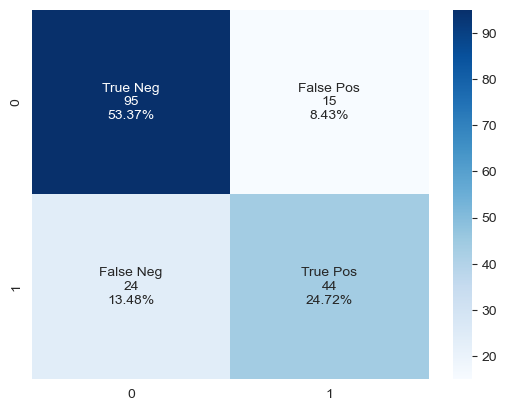

In [49]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_final.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_final.flatten()/np.sum(cm_final)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_final, annot=labels, fmt='', cmap='Blues');

Comment: In Comparison is not super amazing. More true positive but less true negative. But is more relaible than first result (see underneath).

In comparison: The initial first, more unreliable (hence not crossfold validated) model results. 

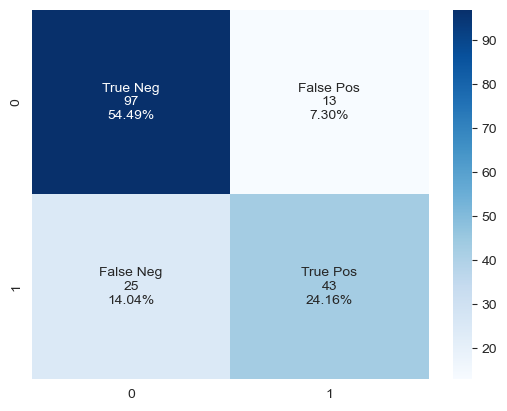

In [50]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues');

In [51]:
#confusion matrix for grid search model
confusion_matrix(y_test, y_pred_test_gs)

array([[95, 15],
       [24, 44]])

In [52]:
#confusion matrix for random search model
confusion_matrix(y_test, y_pred_test_rs)

array([[94, 16],
       [25, 43]])